In [1]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [10]:
from langchain_openai import ChatOpenAI
llm_openai = ChatOpenAI(model = "gpt-4o")
llm_openai.invoke("Give me working groq llm models")

AIMessage(content="As of my last update, Groq, known for its high-performance computing hardware, does not independently develop large language models (LLMs) like OpenAI's GPT or Google's Bard. However, Groq’s hardware is used to optimize the performance of AI models across a range of applications. If you are looking for comprehensive details about LLMs that can run efficiently on Groq hardware, consider using well-known models from popular frameworks that are compatible with various hardware solutions, including those provided by Groq. Here’s a general guide on some popular LLMs and their potential compatibility with high-performance computing:\n\n1. **GPT (Generative Pre-trained Transformer)** - Developed by OpenAI, models like GPT-3 and its successors can potentially be optimized to run on Groq hardware, given the appropriate support in your machine learning frameworks.\n\n2. **BERT (Bidirectional Encoder Representations from Transformers)** - Originally released by Google, BERT mod

In [11]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model = "llama-3.3-70b-versatile")
llm_groq.invoke("Hey")

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.052289323, 'completion_tokens_details': None, 'prompt_time': 0.000942791, 'prompt_tokens_details': None, 'queue_time': 0.059107238, 'total_time': 0.053232114}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--98f60925-e4c7-4cce-9547-bd77d1bb483e-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})

In [12]:
def superbot(state: State):
    return {"messages":[llm_groq.invoke(state["messages"])]}

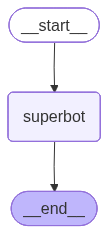

In [16]:
graph = StateGraph(State)

graph.add_node("superbot", superbot)
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile()

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [17]:
graph_builder.invoke({"messages":"Hi i am atharva"})

{'messages': [HumanMessage(content='Hi i am atharva', additional_kwargs={}, response_metadata={}, id='ad03b87c-b7c4-494f-8f5f-ad24b1848ef6'),
  AIMessage(content="Hello Atharva, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 41, 'total_tokens': 69, 'completion_time': 0.044453707, 'completion_tokens_details': None, 'prompt_time': 0.001222849, 'prompt_tokens_details': None, 'queue_time': 0.059266841, 'total_time': 0.045676556}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--0df87a56-cc3f-4c43-bb4a-410b8c31c752-0', usage_metadata={'input_tokens': 41, 'output_tokens': 28, 'total_tokens': 69})]}

In [18]:
graph_builder.invoke({"messages":"How are you"})

{'messages': [HumanMessage(content='How are you', additional_kwargs={}, response_metadata={}, id='63212b2e-9374-4dba-9a9d-8572dea841d6'),
  AIMessage(content="I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 38, 'total_tokens': 84, 'completion_time': 0.081911898, 'completion_tokens_details': None, 'prompt_time': 0.001023818, 'prompt_tokens_details': None, 'queue_time': 0.053652972, 'total_time': 0.082935716}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--165af8d4-f3bd-4e16-85af-2c52eebcc4dd-0', usage_metadata={'input_tokens': 38, 'output_tokens': 46, 'total_tokens': 84})]}

In [19]:
for event in graph_builder.stream({"messages":"Hi I am atharva, tell me about you"}):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hello Atharva, nice to meet you. I am an artificial intelligence language model, which means I'm a computer program designed to understand and generate human-like text. I don't have a personal life, emotions, or physical presence, but I'm here to help answer your questions, provide information, and engage in conversations to the best of my abilities.\n\nI was trained on a massive dataset of text from various sources, including books, articles, and conversations. This training allows me to understand and respond to a wide range of topics, from science and history to entertainment and culture.\n\nI can help you with things like:\n\n* Answering questions on various topics\n* Generating text or ideas\n* Translating text from one language to another\n* Summarizing long pieces of text\n* Offering suggestions or recommendations\n* Chatting and conversing on a topic of your interest\n\nSo, what brings you here today? Is there something specific you